In [2]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

In [3]:
model = BayesianNetwork([("Sunny","Skip"),("Sunny","Ice"),("Ice","Skip")])

In [4]:
sunny = TabularCPD("Sunny",2, [[0.53],[0.47]])

In [5]:
Eating_Ice = TabularCPD(
    "Ice",
    2,
    [
        [0.67, 0.22],
        [0.33, 0.78],
    ],
    evidence=["Sunny"],
    evidence_card=[2],
)

In [6]:
print(Eating_Ice)

+--------+----------+----------+
| Sunny  | Sunny(0) | Sunny(1) |
+--------+----------+----------+
| Ice(0) | 0.67     | 0.22     |
+--------+----------+----------+
| Ice(1) | 0.33     | 0.78     |
+--------+----------+----------+


In [7]:
Skipped_Classes = TabularCPD(
    "Skip",
    2,
    [
        [0.14, 0.39, 0.36, 0.25],
        [0.86, 0.61, 0.64, 0.75],
    ],
    evidence=["Sunny", "Ice"],
    evidence_card=[2,2],
)
print(Skipped_Classes)

+---------+----------+----------+----------+----------+
| Sunny   | Sunny(0) | Sunny(0) | Sunny(1) | Sunny(1) |
+---------+----------+----------+----------+----------+
| Ice     | Ice(0)   | Ice(1)   | Ice(0)   | Ice(1)   |
+---------+----------+----------+----------+----------+
| Skip(0) | 0.14     | 0.39     | 0.36     | 0.25     |
+---------+----------+----------+----------+----------+
| Skip(1) | 0.86     | 0.61     | 0.64     | 0.75     |
+---------+----------+----------+----------+----------+


In [8]:
model.add_cpds(sunny, Eating_Ice, Skipped_Classes)
model.check_model()

True

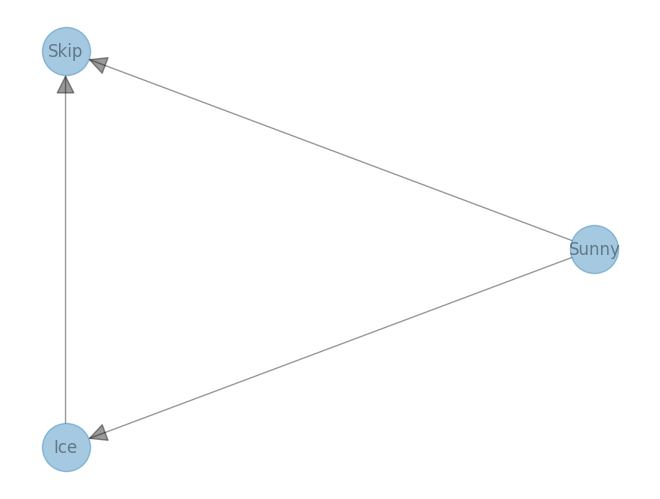

In [9]:
import networkx as nx
import matplotlib.pyplot as plt
nx.draw_circular(
    model, with_labels=True, arrowsize=30, node_size=1200, alpha=0.4
)
plt.show()

In [11]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

posterior_Skip = infer.query(['Skip'], evidence={'Sunny': 1, 'Ice': 1})
print(posterior_Skip)

+---------+-------------+
| Skip    |   phi(Skip) |
+=========+=============+
| Skip(0) |      0.2500 |
+---------+-------------+
| Skip(1) |      0.7500 |
+---------+-------------+


In [12]:
infer2 = VariableElimination(model)

posterior_Ice = infer.query(['Sunny'], evidence={'Ice': 0, 'Skip': 1})
print(posterior_Ice)

+----------+--------------+
| Sunny    |   phi(Sunny) |
+==========+==============+
| Sunny(0) |       0.8219 |
+----------+--------------+
| Sunny(1) |       0.1781 |
+----------+--------------+
